In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os, sys, re

In [2]:
regex= re.compile(r'\d+')

In [3]:
data_folder = os.path.join('/','Users', 'cdesio', 'UoB', 'leakage')

In [4]:
extracted_folder = os.path.join(data_folder, 'extracted')

In [5]:
fnames = os.listdir(extracted_folder)

In [6]:
Temps = []
Tints = []
for fname in fnames:
    split = fname.split('_')
    T = split[0]
    tint = split[1]
    Temps.append(float(T[1:]))
    Tints.append(int(regex.findall(tint)[0]))
    

In [7]:
def sel_files(flist, ts=None):
    selected = []
    if len(ts)>0:
        for t in ts:
            for f in flist:
                if str(t) in f:
                    selected.append(f)
    return sorted(selected)

In [8]:
file_list = set(sel_files(fnames, ts = np.unique(Tints)))-set([])

In [9]:
pixels=[]
rad_dam = [50, 45, 40, 35, 30, 20, 18, 16, 14, 12, 10, 9, 8, 25, 6, 5, 4, 3, 2, 1]
for f in file_list:
    #print(f)
    te = np.float(f.split('_')[0][1:])
    tint = int(regex.findall(f.split('_')[1])[0])
    imported = np.load(os.path.join(extracted_folder,f), allow_pickle=True)['pixels']
    
    for i, f in enumerate(imported):
        iter_rad_dam = iter(rad_dam)
        for r in f:
            label=next(iter_rad_dam)
            #print(i, label, np.mean(r))
            pixels.append([i, label, np.mean(r), te, tint])

In [10]:
len(pixels)

516000

In [11]:
df = pd.DataFrame(pixels, columns=['f_nb','rad_dam','intensity', 'T', 'tint'])

In [12]:
df.head()

,f_nb,rad_dam,intensity,T,tint
0,0,50,16358.6325,30.0,3857568
1,0,45,16312.5625,30.0,3857568
2,0,40,16301.7050,30.0,3857568
3,0,35,16266.4200,30.0,3857568
4,0,30,16260.5625,30.0,3857568


In [13]:
avg = df.groupby(['T', 'rad_dam', 'tint'], as_index=False).agg({'intensity': ['mean', 'std']})

In [46]:
avg.columns

MultiIndex([(        'T',     ''),
            (  'rad_dam',     ''),
            (     'tint',     ''),
            ('intensity', 'mean'),
            ('intensity',  'std')],
           )

In [143]:
np.unique(avg['T'])

array([-20. , -15. , -10. ,  -5. ,   0.1,   4.9,  10. ,  14.9,  20. ,
        24.8,  30. ])

In [149]:
tints = []
Temps = []
rads = []
intensities = []
errors = []
for (T,r,t), group in avg[avg['rad_dam']<15][avg['T'].isin([-20.0, -10.0, 0.1, 10.0, 30.0])].groupby(['T', 'rad_dam', 'tint']):
    print(T,r,t, float(group[('intensity','mean')]))
    Temps.append(T)
    tints.append(t)
    rads.append(r)
    intensities.append(float(group[('intensity','mean')]))
    errors.append(float(group[('intensity','std')]))

/Users/cdesio/opt/anaconda3/envs/pyroot/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


-20.0 1 1753440 2491.2871124999997
-20.0 1 3857568 2571.354637499999
-20.0 1 5260320 2633.6115625000025
-20.0 1 8767200 2576.5917125
-20.0 1 10169952 2592.9887875000004
-20.0 1 11572704 2549.1831625000004
-20.0 1 13676832 2613.7102999999993
-20.0 1 15780960 2603.5410125000008
-20.0 1 21391968 2673.916537499999
-20.0 1 26301600 2531.3186000000014
-20.0 1 31912608 2683.0695625
-20.0 1 33315360 2553.963199999999
-20.0 1 35068800 2664.2305125
-20.0 2 1753440 2605.309962499999
-20.0 2 3857568 2696.2158750000003
-20.0 2 5260320 2540.2881375000006
-20.0 2 8767200 2708.1941875
-20.0 2 10169952 2698.452337500001
-20.0 2 11572704 2539.3422625000007
-20.0 2 13676832 2752.1933624999992
-20.0 2 15780960 2759.8353500000003
-20.0 2 21391968 2798.180649999999
-20.0 2 26301600 2607.3694625000003
-20.0 2 31912608 2838.263662499999
-20.0 2 33315360 2605.2267250000004
-20.0 2 35068800 2881.8885499999997
-20.0 3 1753440 2804.200649999997
-20.0 3 3857568 2900.235612499999
-20.0 3 5260320 2383.2879125000004


-10.0 12 13676832 6419.906150000001
-10.0 12 15780960 6877.7207625
-10.0 12 21391968 7963.251874999998
-10.0 12 26301600 9131.649449999997
-10.0 12 31912608 10407.888875000006
-10.0 14 1753440 3895.654424999999
-10.0 14 3857568 4395.488874999999
-10.0 14 5260320 4705.697587500001
-10.0 14 8767200 5445.2028125000015
-10.0 14 10169952 5762.635399999999
-10.0 14 11572704 5974.2634499999995
-10.0 14 13676832 6566.607512500004
-10.0 14 15780960 7037.272362500002
-10.0 14 21391968 8252.626599999996
-10.0 14 26301600 9389.423987499998
-10.0 14 31912608 10683.065675000003
0.1 1 1753440 2941.6354125000003
0.1 1 2454816 2910.8256999999994
0.1 1 3857568 2967.5093875000007
0.1 1 5260320 2957.025199999999
0.1 1 6663072 2986.5434625
0.1 1 7364448 3008.232962499999
0.1 1 8767200 3076.5626124999994
0.1 1 10169952 3232.712012500002
0.1 1 10871328 3076.885075000001
0.1 1 11572704 3279.370175000001
0.1 1 13676832 3344.0889874999993
0.1 1 15780960 3395.5940375000005
0.1 1 21391968 3630.0110125000006
0.1 1

10.0 12 3857568 10864.403199999995
10.0 12 4558944 11413.87293750001
10.0 12 5260320 13505.917100000006
10.0 12 6663072 14628.182075000004
10.0 12 7364448 15283.507974999982
10.0 12 8767200 16324.611775000014
10.0 12 9468576 16313.6428
10.0 12 10169952 16358.853712500004
10.0 12 10871328 16365.559625
10.0 12 11572704 16360.076175000004
10.0 12 13676832 16335.290975000005
10.0 14 1753440 7268.329874999996
10.0 14 2454816 8366.731287500006
10.0 14 3156192 9391.486262500002
10.0 14 3857568 11223.162125000006
10.0 14 4558944 11878.408462499998
10.0 14 5260320 13901.464825
10.0 14 6663072 15014.500350000006
10.0 14 7364448 15654.432637500002
10.0 14 8767200 16341.156862500009
10.0 14 9468576 16343.251437499992
10.0 14 10169952 16355.999074999998
10.0 14 10871328 16361.10423749999
10.0 14 11572704 16355.330675000001
10.0 14 13676832 16328.146675
30.0 1 1753440 4626.477762499998
30.0 1 2454816 5590.202849999999
30.0 1 3857568 6743.832837499999
30.0 1 5260320 7531.199662499998
30.0 1 6663702 9

In [150]:
tints = np.array(tints)
Temps = np.array(Temps)
rads = np.array(rads)
intensities = np.array(intensities)
errors = np.array(errors)

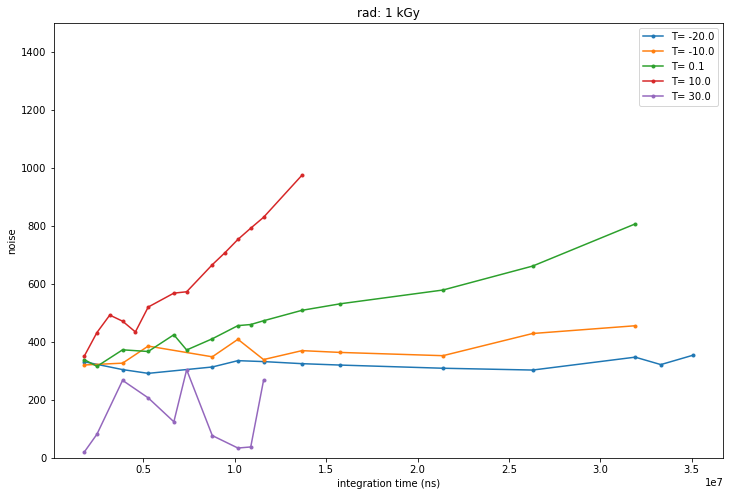

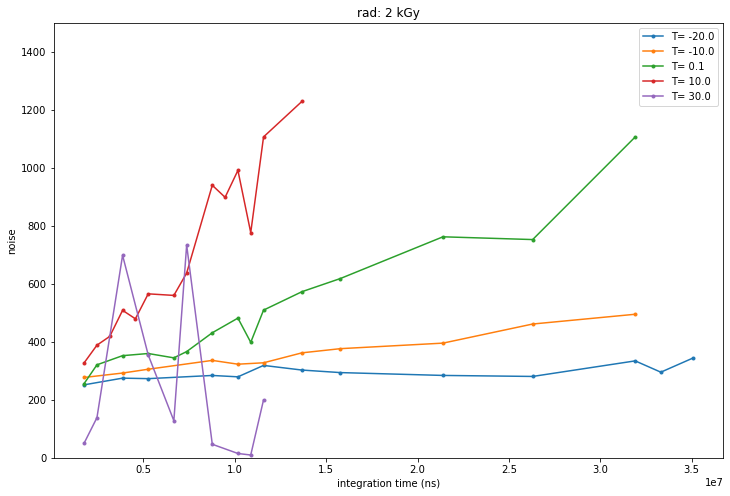

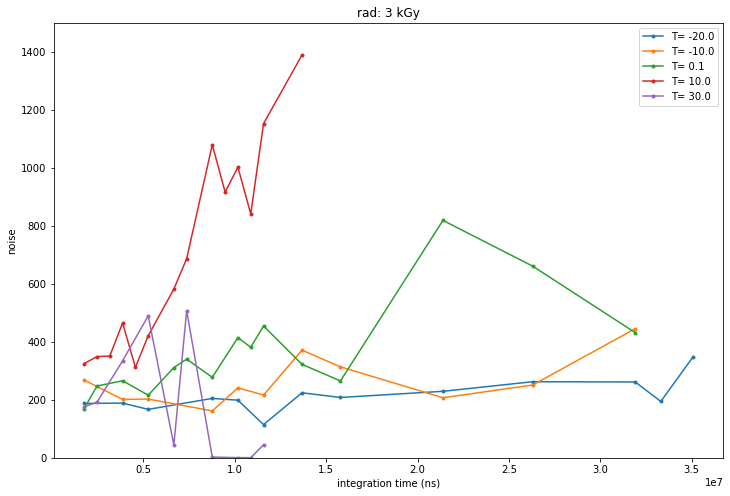

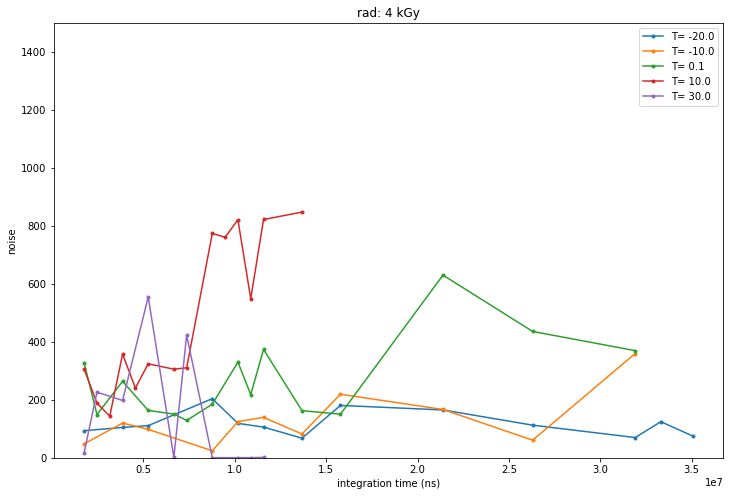

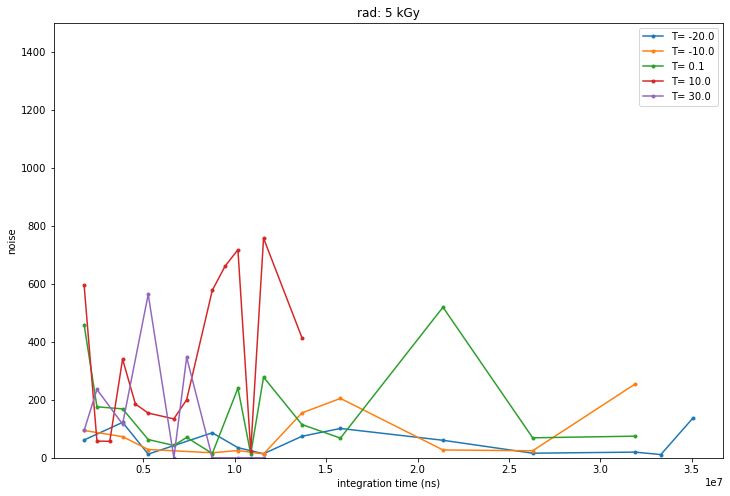

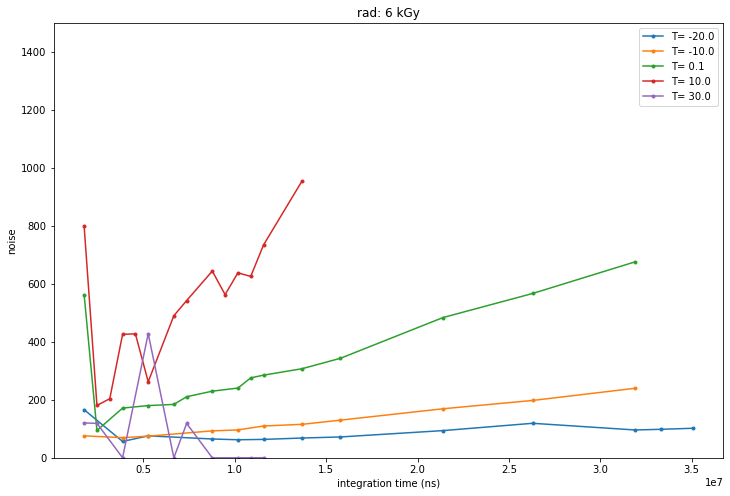

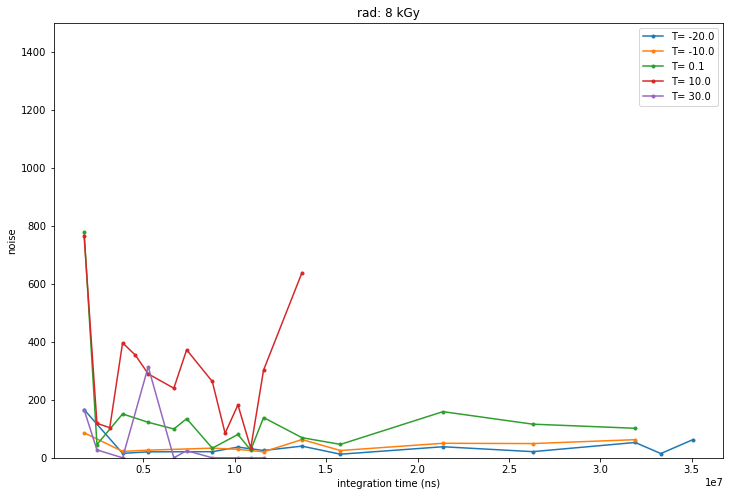

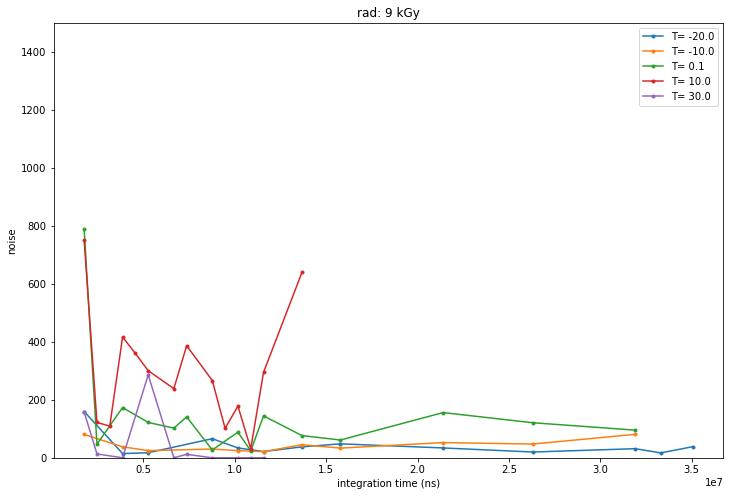

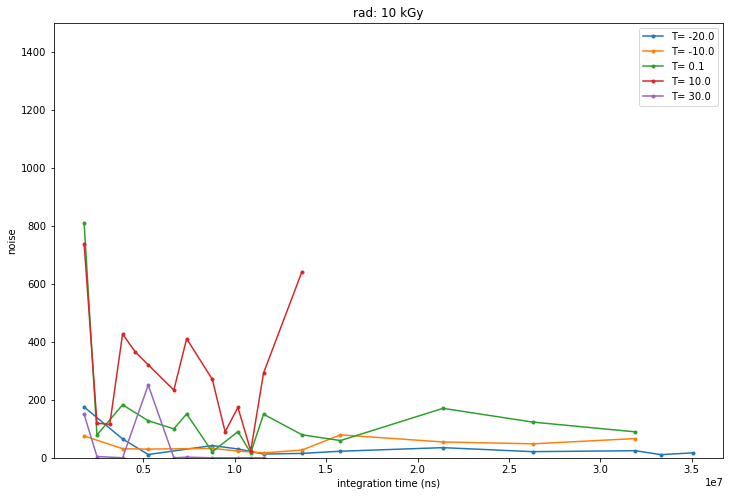

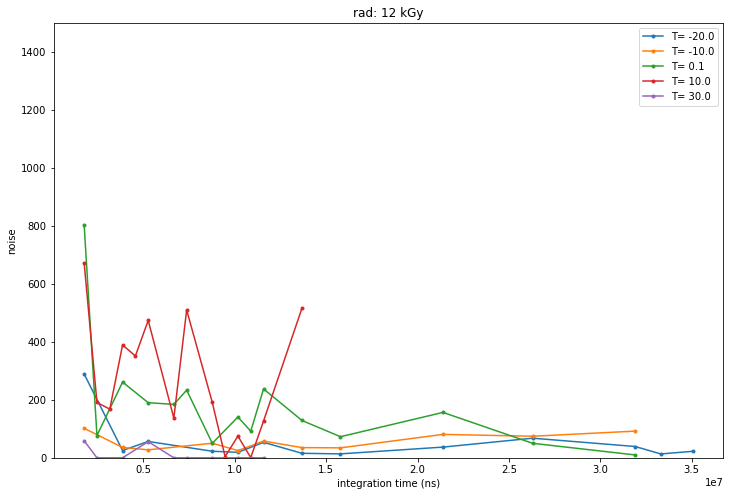

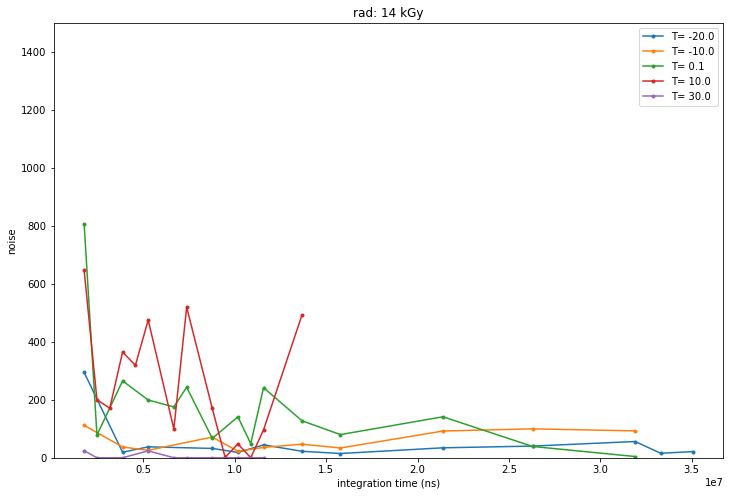

In [155]:
for r in np.unique(rads):
    plt.figure(figsize=(12,8))
    for t in np.unique(Temps):
        
        plt.plot(tints[np.argwhere(rads==r)][np.where(Temps[np.argwhere(rads==r)]==t)[0]], 
                 errors[np.argwhere(rads==r)][np.where(Temps[np.argwhere(rads==r)]==t)[0]],
                 'o-',markersize=3,
                label = 'T= {}'.format(t))
        plt.title('rad: {} kGy'.format(r))
        plt.xlabel('integration time (ns)')
        plt.ylabel('noise')
        plt.ylim(0,1500)
    plt.legend(loc='upper right')
    #plt.show()
    plt.savefig('noise_vs_tint_5_temperatures_{}kGy.png'.format(r))

In [ ]:
for r in np.unique(rads):
    plt.figure(figsize=(12,8))
    for t in np.unique(Temps):
        
        plt.plot(tints[np.argwhere(rads==r)][np.where(Temps[np.argwhere(rads==r)]==t)[0]], 
                 intensities[np.argwhere(rads==r)][np.where(Temps[np.argwhere(rads==r)]==t)[0]],
                 'o-',markersize=3,
                label = 'T= {}'.format(t))
        plt.title('rad: {} kGy'.format(r))
        plt.xlabel('integration time (ns)')
        plt.ylabel('pedestal')
        plt.ylim(0,1500)
    plt.legend(loc='upper right')
    #plt.show()
    plt.savefig('pedestal_vs_tint_5_temperatures_{}kGy.png'.format(r))

In [ ]:
for r in np.unique(rads):
    for t in np.unique(Temps):
        plt.scatter(tints[])

/Users/cdesio/opt/anaconda3/envs/pyroot/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


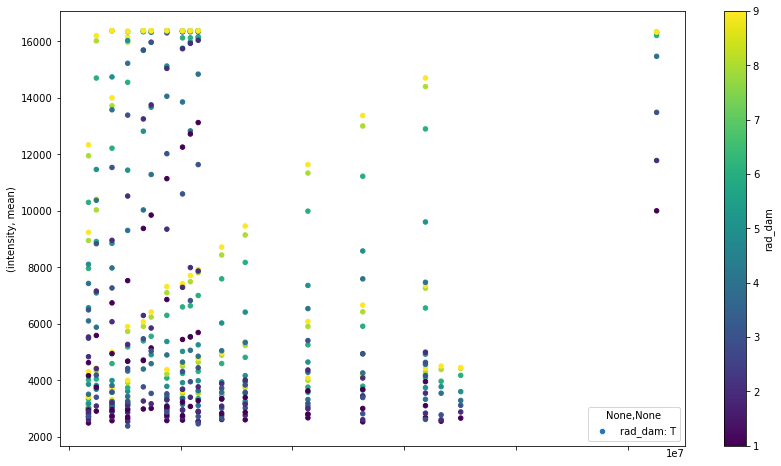

In [103]:
avg[avg['rad_dam']<10][avg['T'].isin([-20.0, -10.0, 0.1, 20.0, 30.0])].plot(x='tint',
                                                                            y=('intensity','mean'),
                                         figsize=(14,8), kind='scatter', style='-o',c='rad_dam', cmap='viridis',label='rad_dam: {}'.format('T'))

-20.0 1.0 1753440 2491.2871124999997 331.34915560190694
-20.0 1.0 3857568 2571.354637499999 304.2454778684757
-20.0 1.0 5260320 2633.6115625000025 291.2829979620949
-20.0 1.0 8767200 2576.5917125 313.23614866402835
-20.0 1.0 10169952 2592.9887875000004 335.07256422852544
-20.0 1.0 11572704 2549.1831625000004 331.86163489715545
-20.0 1.0 13676832 2613.7102999999993 324.67510961361137
-20.0 1.0 15780960 2603.5410125000008 319.833119321162
-20.0 1.0 21391968 2673.916537499999 308.90184627139917
-20.0 1.0 26301600 2531.3186000000014 302.69363849043424
-20.0 1.0 31912608 2683.0695625 347.1311643319679
-20.0 1.0 33315360 2553.963199999999 321.48429292022905
-20.0 1.0 35068800 2664.2305125 353.69796523101667
-20.0 2.0 1753440 2605.309962499999 251.699801140792
-20.0 2.0 3857568 2696.2158750000003 274.76823064087995
-20.0 2.0 5260320 2540.2881375000006 273.0233458170159
-20.0 2.0 8767200 2708.1941875 284.0044661767672
-20.0 2.0 10169952 2698.452337500001 279.3074460125571
-20.0 2.0 11572704 25

/Users/cdesio/opt/anaconda3/envs/pyroot/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:338: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


-20.0 2.0 33315360 2605.2267250000004 295.3462766629286
-20.0 2.0 35068800 2881.8885499999997 343.9349093041085
-20.0 3.0 1753440 2804.200649999997 187.51724210910857
-20.0 3.0 3857568 2900.235612499999 188.68617020359258
-20.0 3.0 5260320 2383.2879125000004 167.0722729962443
-20.0 3.0 8767200 2936.4961 204.852459415295
-20.0 3.0 10169952 2940.453949999999 198.71512272982702
-20.0 3.0 11572704 2460.055637500001 114.47590280432058
-20.0 3.0 13676832 2641.385425000001 224.19253601277342
-20.0 3.0 15780960 3022.6549000000005 208.11496560805207
-20.0 3.0 21391968 3079.2525625000017 229.3895266452073
-20.0 3.0 26301600 2818.3523499999988 262.3993187419393
-20.0 3.0 31912608 2618.3023625 261.54800425286277
-20.0 3.0 33315360 2777.6020875 194.40785521105522
-20.0 3.0 35068800 3116.7301 347.0462288358331
-20.0 4.0 1753440 3032.274037499998 93.5387552116773
-20.0 4.0 3857568 3070.0132375000003 104.7236364075085
-20.0 4.0 5260320 2992.5995750000006 110.9765010412623
-20.0 4.0 8767200 3022.827262

-15.0 8.0 11572704 4075.860437500003 17.872080146730944
-15.0 8.0 13676832 4128.275199999998 59.16856407827945
-15.0 8.0 15780960 4325.818725000002 14.647989166434321
-15.0 8.0 21391968 4704.7434875 35.49686651884773
-15.0 8.0 26301600 5031.361899999999 31.264183312233214
-15.0 8.0 31912608 5345.123299999999 34.08159497260779
-15.0 9.0 1753440 3311.5073499999985 293.63949707999444
-15.0 9.0 3857568 3536.0555625000006 25.349125094470534
-15.0 9.0 5260320 3609.108562500004 64.73463831736589
-15.0 9.0 8767200 3949.2799374999995 23.136669506306806
-15.0 9.0 10169952 3987.2871624999993 32.51081253522917
-15.0 9.0 11572704 4161.562850000002 23.25353540154448
-15.0 9.0 13676832 4130.0872875000005 35.43912362279599
-15.0 9.0 15780960 4418.814875 23.96066715000327
-15.0 9.0 21391968 4825.3696875 32.98312753429011
-15.0 9.0 26301600 5178.310025 35.81701787168211
-15.0 9.0 31912608 5528.038287500001 40.032250422697935
-10.0 1.0 1753440 2708.409375 320.1525760407445
-10.0 1.0 3857568 2747.29141250

-5.0 5.0 8767200 3969.329600000002 136.72613444116558
-5.0 5.0 10169952 4464.154425 19.480881406425773
-5.0 5.0 11572704 4537.704912499999 242.59111574266896
-5.0 5.0 13676832 4684.967800000002 273.92433797897723
-5.0 5.0 15780960 5196.444774999999 54.85308787063934
-5.0 5.0 21391968 5965.623762500002 105.47202078765974
-5.0 5.0 26301600 6066.3131875 350.08566615936553
-5.0 5.0 31912608 7670.344575 283.1161482422839
-5.0 6.0 1753440 3638.442275000001 677.2051484853018
-5.0 6.0 3857568 4007.611425000001 68.15989988240372
-5.0 6.0 5260320 4060.069012499999 149.70527838787893
-5.0 6.0 8767200 4790.8728875000015 123.0218662489842
-5.0 6.0 10169952 4946.881374999999 158.18903736672786
-5.0 6.0 11572704 5339.803474999997 211.32500855718703
-5.0 6.0 13676832 5977.251549999997 347.9071835490722
-5.0 6.0 15780960 6091.053499999995 228.36724751648143
-5.0 6.0 21391968 7429.239712500001 370.5848410016583
-5.0 6.0 26301600 8187.743874999995 405.7082895706777
-5.0 6.0 31912608 10025.235437500001 64

0.1 9.0 15780960 9466.123762500005 61.30959362204574
0.1 9.0 21391968 11639.701062499995 155.9215258822356
0.1 9.0 26301600 13376.096262499992 120.97883008851316
0.1 9.0 31912608 14708.686462500002 95.43625260487332
4.9 1.0 1753440 2875.9825750000005 321.56457707280117
4.9 1.0 2454816 2978.8636375000015 356.29647614908504
4.9 1.0 3857568 3021.4713124999985 379.1506344947181
4.9 1.0 5260320 2902.374737500001 378.05478495571725
4.9 1.0 6663072 3130.7880750000004 420.72727925025396
4.9 1.0 7364448 3203.221225 520.0403476515564
4.9 1.0 8767200 3151.1313625 422.60477401812983
4.9 1.0 10169952 3455.0128374999995 527.6230874579866
4.9 1.0 10871328 3387.6149750000013 528.1353680149659
4.9 1.0 11572704 3561.145287499998 575.7482115365832
4.9 1.0 13676832 3707.3419999999983 637.9151194733024
4.9 1.0 15780960 3748.1873499999997 760.9755979385636
4.9 1.0 21391968 4107.15225 870.5711202848004
4.9 2.0 1753440 2776.4801499999994 330.50241293684286
4.9 2.0 2454816 3198.327725 331.66699766590517
4.9 2.

10.0 4.0 10169952 7682.331925000002 820.8528390772709
10.0 4.0 10871328 8432.4079125 548.9049348857645
10.0 4.0 11572704 7963.401512499993 821.9942087060522
10.0 4.0 13676832 9370.210937500004 847.4229720067201
10.0 5.0 1753440 4720.057424999998 594.5585507488095
10.0 5.0 2454816 4941.595274999997 57.47108711349528
10.0 5.0 3156192 5223.075699999998 56.94323764076408
10.0 5.0 3857568 5266.3903125 340.3807255768416
10.0 5.0 4558944 5994.031537499999 185.46808647170897
10.0 5.0 5260320 6829.8236124999985 154.23703221100106
10.0 5.0 6663072 7247.859962499996 134.28865629826777
10.0 5.0 7364448 7727.7316625 200.37035199129528
10.0 5.0 8767200 8771.818662500002 577.5482583302517
10.0 5.0 9468576 8082.620312499997 661.234882690897
10.0 5.0 10169952 8536.495462500003 717.6522006377587
10.0 5.0 10871328 9600.630062500004 23.46942412605955
10.0 5.0 11572704 8911.974550000008 757.4933049844993
10.0 5.0 13676832 11038.039412500006 413.91908871156244
10.0 6.0 1753440 4973.7329125000015 798.7717058

20.0 2.0 10871328 7994.609200000003 2583.658864258114
20.0 2.0 11572704 7872.612049999999 2579.3893143375803
20.0 2.0 52603224 11785.745149999999 3832.3501226366857
20.0 3.0 1753440 5491.3179 733.9457579761313
20.0 3.0 2454816 4187.510699999997 287.51081864920656
20.0 3.0 3857568 7272.7127999999975 340.0199590244998
20.0 3.0 5260320 4422.177537499999 1029.6688651411118
20.0 3.0 6663072 5472.482262499995 728.134552985086
20.0 3.0 7364448 5038.587775000002 1243.7836663451856
20.0 3.0 8767200 12026.808724999999 633.3703910157559
20.0 3.0 10169952 10602.510225000004 2585.6945689325767
20.0 3.0 10871328 6825.755287500003 1160.278989687637
20.0 3.0 11572704 11640.424400000002 2629.128959043311
20.0 3.0 52603224 13491.031362499994 3227.824616802134
20.0 4.0 1753440 6106.028275000002 726.5686407636704
20.0 4.0 2454816 5882.109437499999 203.01985056892218
20.0 4.0 3857568 7981.072862500005 758.5928881017431
20.0 4.0 5260320 9309.8916875 669.1695491908739
20.0 4.0 6663072 10034.874162500002 355.

30.0 1.0 7364448 9853.117449999996 303.76276689301494
30.0 1.0 8767200 11143.172687500002 76.70227948011598
30.0 1.0 10169952 12260.148899999995 33.651452049505735
30.0 1.0 10871328 12724.733337499994 37.41534064770572
30.0 1.0 11572704 13129.855124999993 267.162728635271
30.0 2.0 1753440 5536.002012499998 50.55788749774598
30.0 2.0 2454816 7162.239275000001 138.47330851065232
30.0 2.0 3857568 8960.142925000004 698.5011836923434
30.0 2.0 5260320 10527.453225000007 354.7368744733097
30.0 2.0 6663702 13257.361087500003 127.91715574402743
30.0 2.0 7364448 13754.60793749999 733.8297985989486
30.0 2.0 8767200 15047.037199999995 46.676294395710876
30.0 2.0 10169952 15743.9233625 14.880907636895952
30.0 2.0 10871328 15933.139024999999 9.580703241929848
30.0 2.0 11572704 16043.146912500006 199.85105256507407
30.0 3.0 1753440 6496.980787500002 175.7917345980422
30.0 3.0 2454816 8839.678312499998 191.79191587835476
30.0 3.0 3857568 11539.737625000002 334.3992839548734
30.0 3.0 5260320 13392.2475

KeyboardInterrupt: 

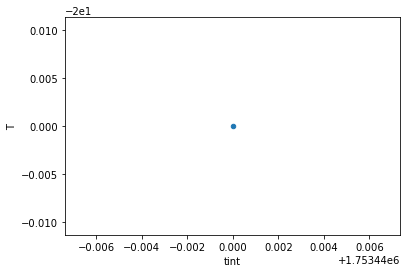

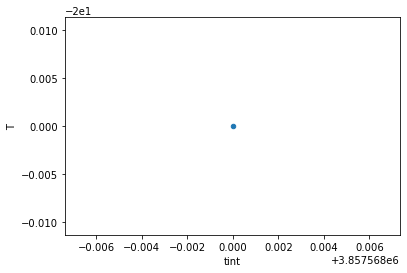

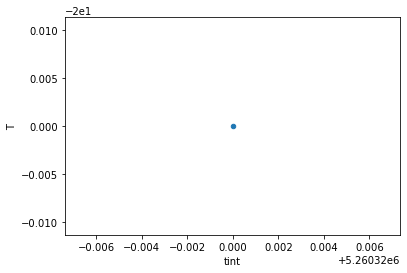

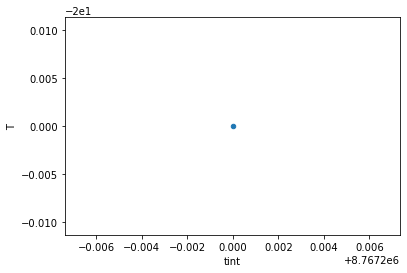

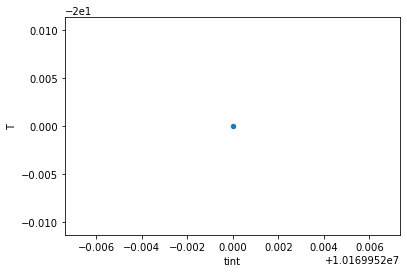

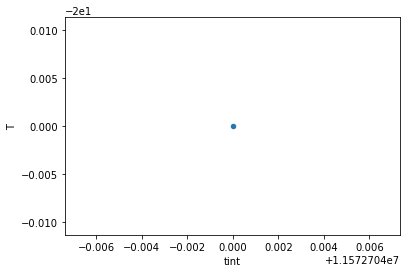

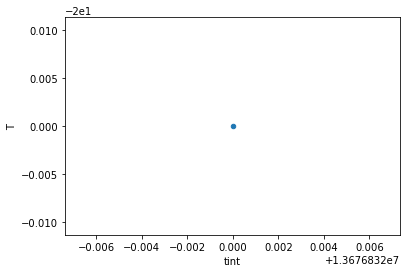

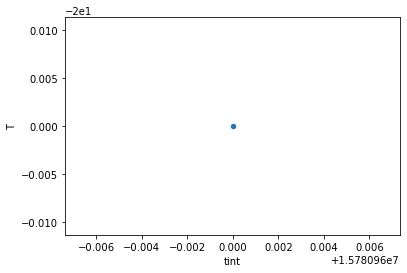

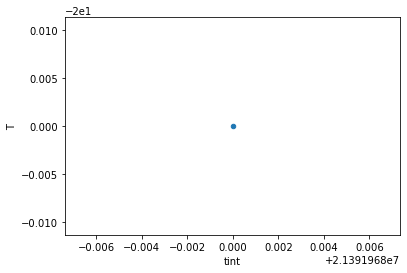

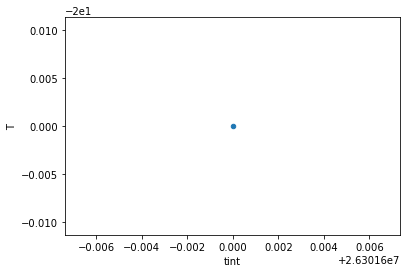

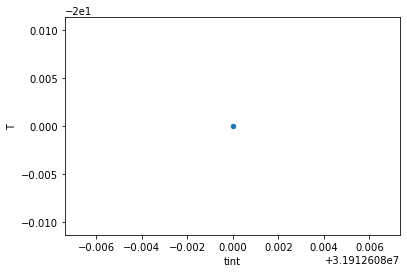

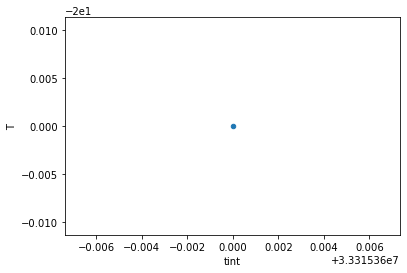

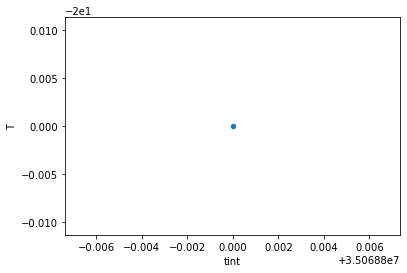

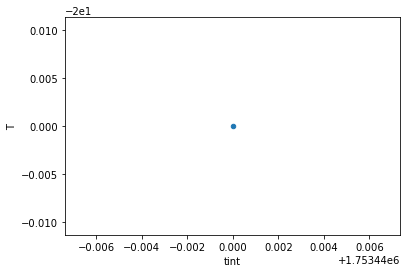

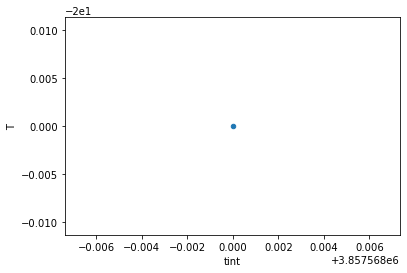

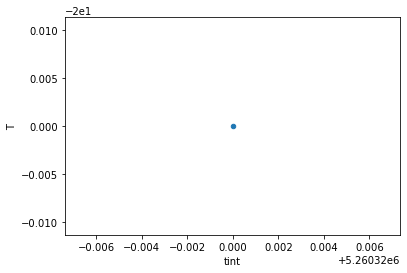

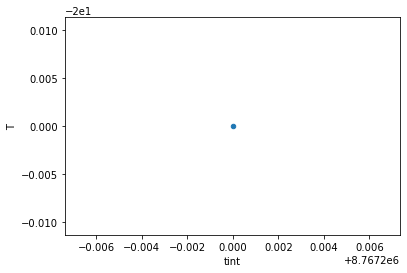

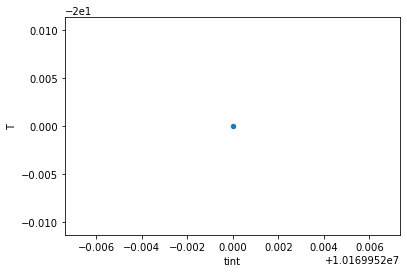

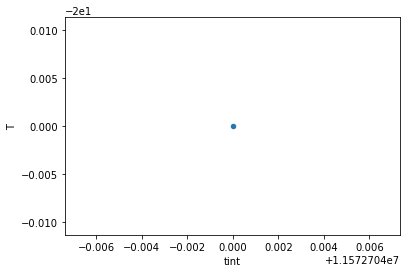

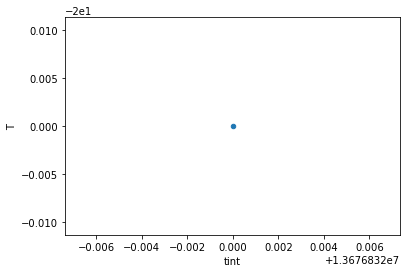

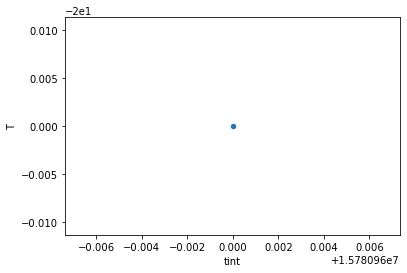

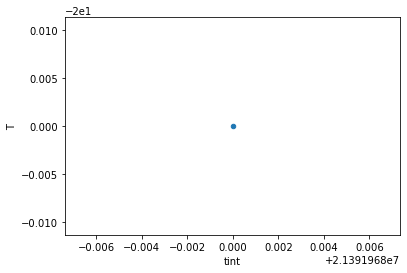

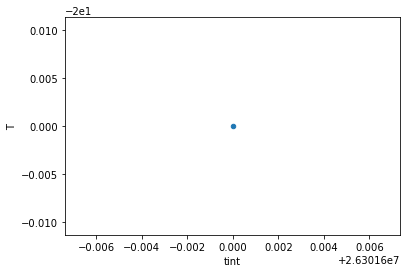

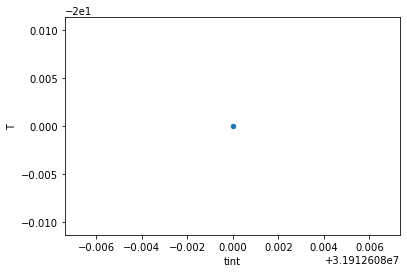

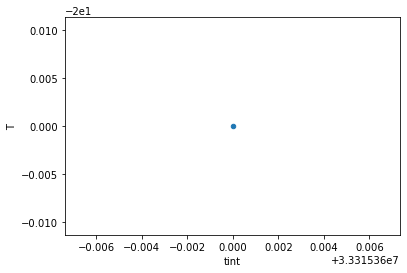

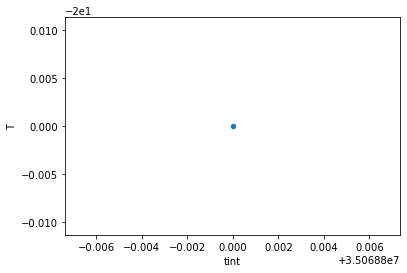

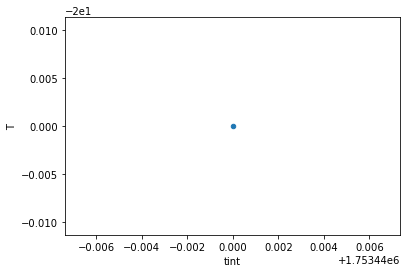

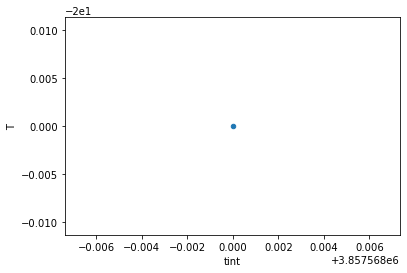

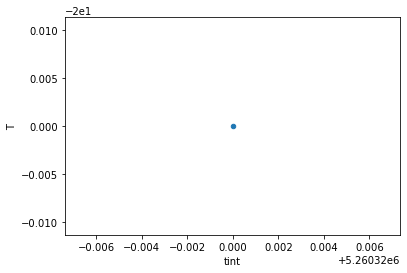

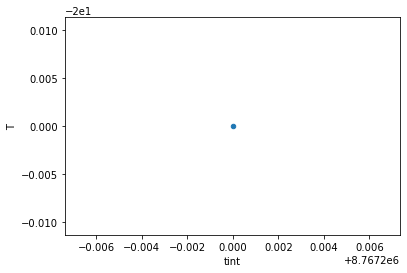

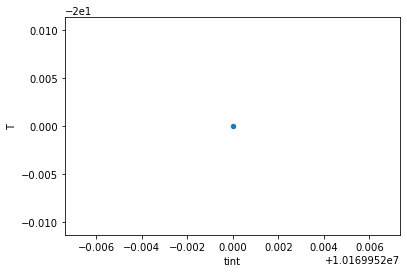

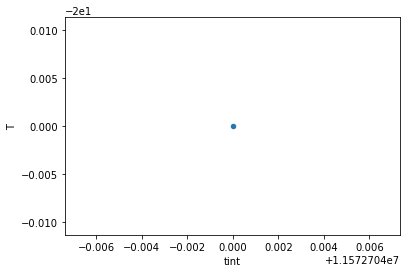

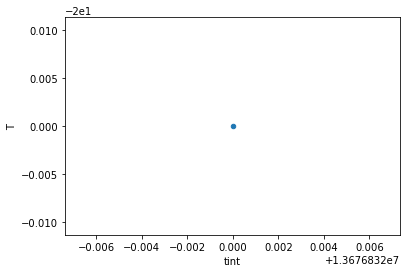

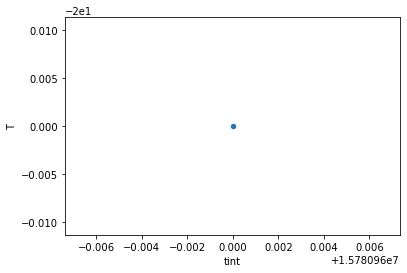

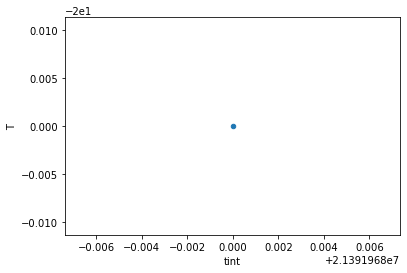

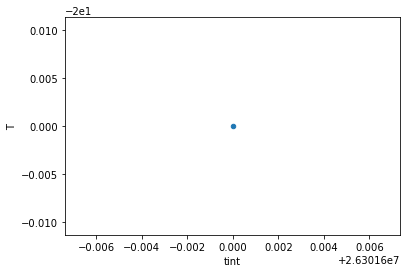

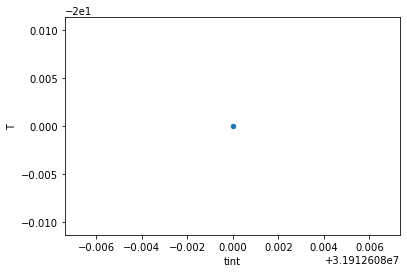

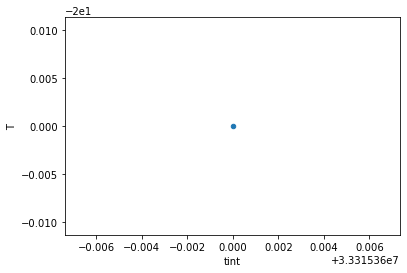

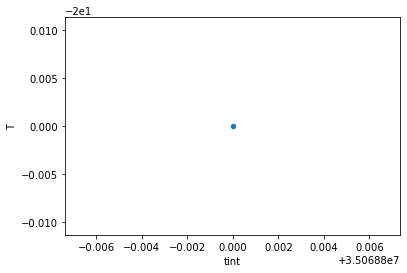

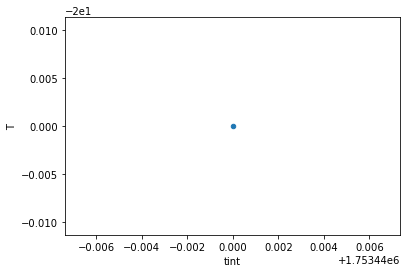

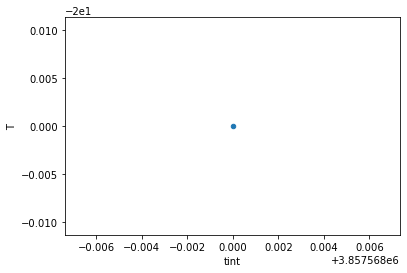

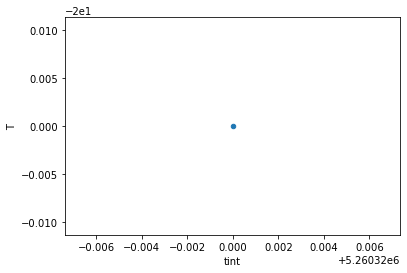

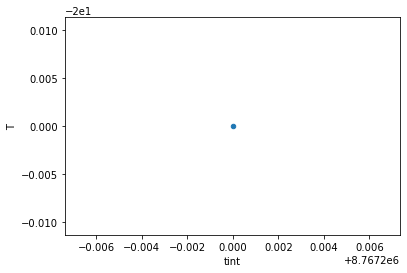

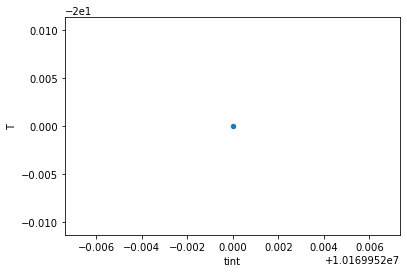

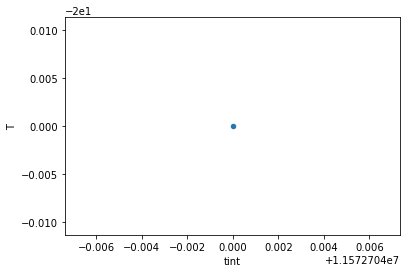

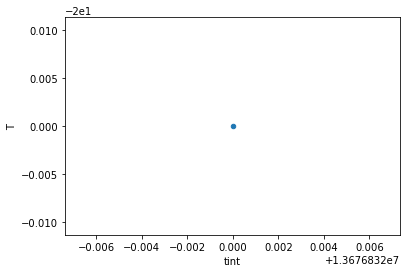

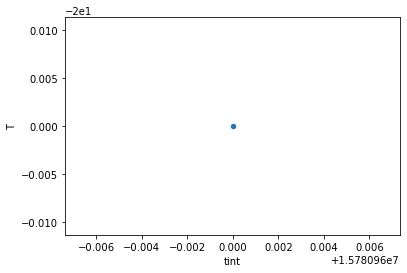

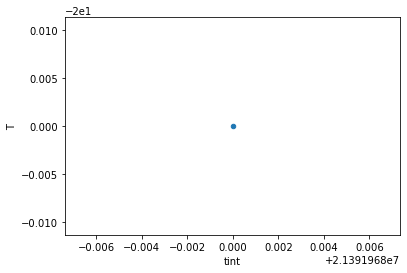

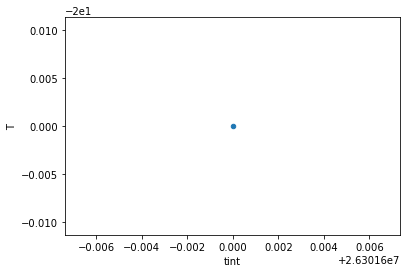

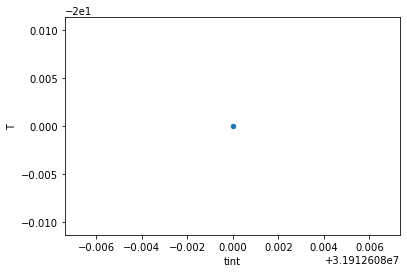

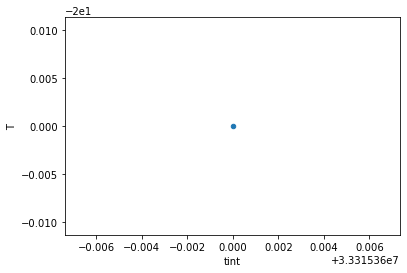

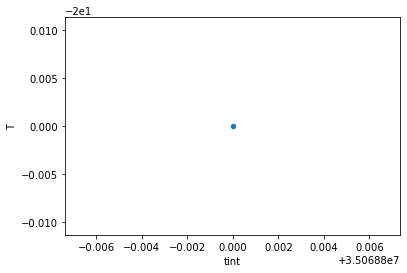

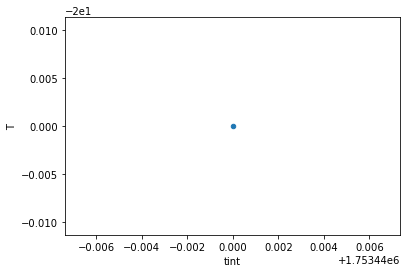

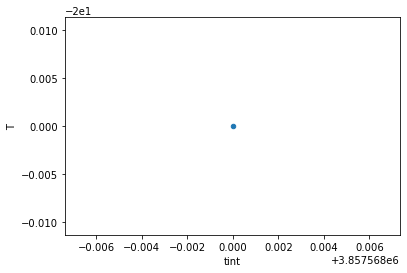

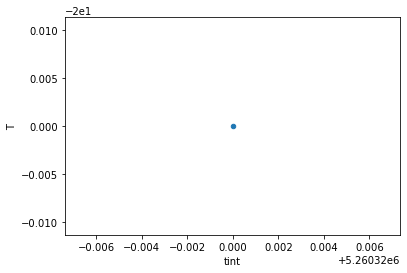

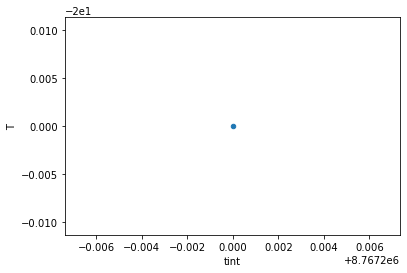

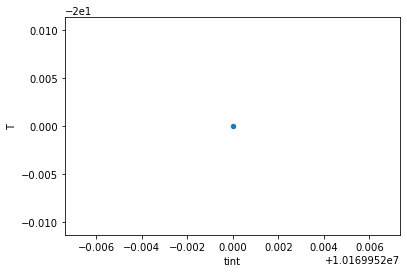

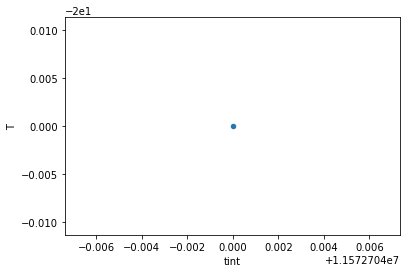

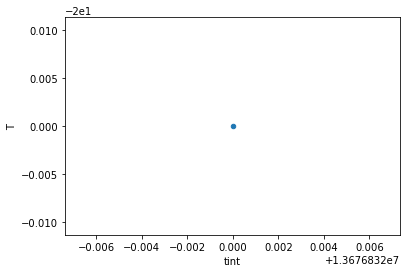

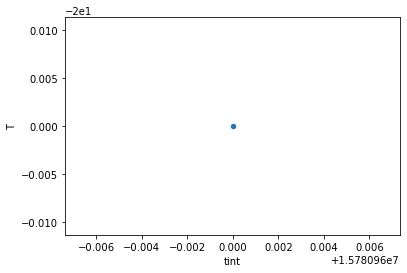

Error in callback <function flush_figures at 0x108545f28> (for post_execute):


KeyboardInterrupt: 

In [36]:
for (T, rad_dam, tint), group in avg[avg['rad_dam']<10].groupby(['T','rad_dam', 'tint']):
    print(float(group['T']),float(group['rad_dam']), int(group['tint']), float(group['intensity']['mean']),float(group['intensity']['std']))
    group.plot.scatter(x='tint', y='T')

[1753440] [5978.0113625]


AttributeError: 'numpy.ndarray' object has no attribute 'append'

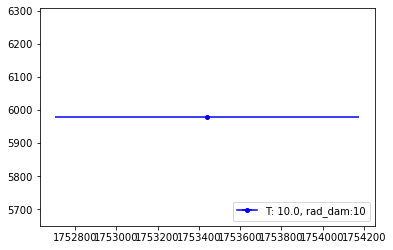

In [25]:
colors =['k','r','b','g','y','orange','dodgerblue','deeppink','slategrey','darkviolet','darkred']

tints = []
intensities = []
errors = []
for (T, rad_dam, tint), group in avg.groupby(['T','rad_dam', 'tint']):
    cs = iter(colors)
    if T==10 and rad_dam==10:
        col = next(cs)
        multifile_intensity = np.array(group['intensity']['mean'])
        std = np.array(group['intensity']['std'])
        #print(multifile_intensity[0], std[0], T,rad_dam, tint)
        tints.append(tint)
        intensities.append(multifile_intensity[0])
        errors.append(std[0])
        tints = np.array(tints)
        intensities = np.array(intensities)
        errors = np.array(errors)
        print(tints, intensities)
        plt.errorbar(x=tints, y=intensities, xerr=errors,fmt='o-',
                    markersize=4, capsize=0, c='b',ecolor='b', label='T: {}, rad_dam:{}'.format(T, rad_dam))
        plt.legend(loc='lower right')
        plt.show